Хакатоне Sibur Challenge 2023


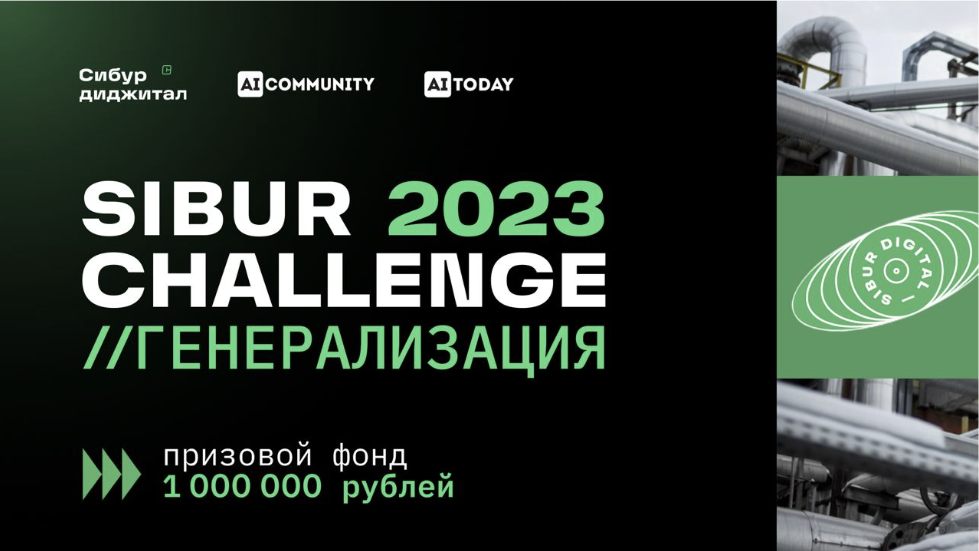

In [2]:
import cv2
import numpy as np
import glob
from tqdm import tqdm

names = ['bridge_down', 'bridge_up', 'no_action', 'train_in_out']
vid, vid_name = [], []

for name in names:
    video_files = glob.glob(f'train_videos/{name}/*.mp4')

    for i, video_file in enumerate(tqdm(video_files)):
        cap = cv2.VideoCapture(video_file)

        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
#             frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#             frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
#             frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
            frames.append(frame)

        frames = np.array(frames)
        indices = np.random.choice(len(frames), 50, replace=False)
        frames = np.delete(frames, indices, axis=0)
        features_f = fts_extract(frames[1:]).numpy()
        vid.append(features_f)
        vid_name.append(name)
        cap.release()

np.random.seed(42)
vid = np.array(vid)
vid_name = np.array(vid_name)
idx = np.random.permutation(range(len(vid_name)))
vid, vid_name = vid[idx], vid_name[idx]

X_data, Y_data = [], []
Len_video = 10

for I, video in tqdm(enumerate(vid)):
    name = vid_name[I]
    gap = 15
    len_clip = len(video)
    if len_clip < Len_video*gap:
        gap = len_clip//Len_video
    for i in range(gap):
        inds = list(range(i, i+Len_video*gap, gap))
        X_data.append(video[inds])
        if name == 'bridge_down':
            Y_data.append([1, 0, 0, 0])
        if name == 'bridge_up':
            Y_data.append([0, 1, 0, 0])
        if name == 'no_action':
            Y_data.append([0, 0, 1, 0])
        if name == 'train_in_out':
            Y_data.append([0, 0, 0, 1])
del vid

X_data = np.array(X_data, dtype=np.float32)
# X_data = X_data/255
Y_data = np.array(Y_data)

print(X_data.shape)
print(Y_data.mean(axis=0))

l = len(X_data)
# idx = np.random.permutation(range(len(Y_data)))
# X_data, Y_data = X_data[idx,:,:,:], Y_data[idx]

n = 0.66
x_train = np.array(X_data[0 : int(n*l)])
y_train = np.array(Y_data[0 : int(n*l)])
idx = np.random.permutation(range(len(y_train)))
x_train, y_train = x_train[idx], y_train[idx]

x_val = np.array(X_data[int(n*l) : int(1*l)])
y_val = np.array(Y_data[int(n*l) : int(1*l)])
idx = np.random.permutation(range(len(y_val)))
x_val, y_val = x_val[idx], y_val[idx]

print('train ', x_train.shape, y_train.mean(axis=0))
print('val ', x_val.shape, y_val.mean(axis=0))

del X_data

100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [01:32<00:00,  1.40s/it]
C:\Users\#9\AppData\Local\Temp\ipykernel_456\4147300442.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vid = np.array(vid)
496it [00:00, 6389.02it/s]


(7053, 10, 768)
[0.60286403 0.15950659 0.10421097 0.1334184 ]
train  (4654, 10, 768) [0.59948431 0.15792866 0.11280619 0.12978083]
val  (2399, 10, 768) [0.60942059 0.16256774 0.08753647 0.1404752 ]


In [10]:
import cv2
import numpy as np
import glob
from tqdm import tqdm

names = ['bridge_down', 'bridge_up', 'no_action', 'train_in_out']

videos = {}
videos['bridge_down'] = []
videos['bridge_up'] = []
videos['no_action'] = []
videos['train_in_out'] = []

for name in names:
    video_files = glob.glob(f'train_videos/{name}/*.mp4')

    for i, video_file in enumerate(tqdm(video_files)):
        cap = cv2.VideoCapture(video_file)

        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)

        frames = np.array(frames)
        videos[name].append(frames[1:])
#         np.save(f'train/{name}/{i}.npy', frames)
        cap.release()
    videos[name] = np.array(videos[name])

100%|████████████████████████████████████████████████████████████████████████████████| 306/306 [00:18<00:00, 16.20it/s]
C:\Users\ser-a\AppData\Local\Temp\ipykernel_8724\1296806905.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  videos[name] = np.array(videos[name])
100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:03<00:00, 18.36it/s]


In [1]:
import cv2
import numpy as np
import glob
from tqdm import tqdm

names = ['bridge_down', 'bridge_up', 'no_action', 'train_in_out']

videos = {}
videos['bridge_down'] = []
videos['bridge_up'] = []
videos['no_action'] = []
videos['train_in_out'] = []

for name in names:
    video_files = glob.glob(f'train/{name}/*.npy')
    for video_file in video_files:
        frames = np.load(video_file)
        videos[name].append(frames[1:])
    videos[name] = np.array(videos[name])

Код для удобного просмотра всех видео 

In [15]:
cv2.namedWindow("original", cv2.WINDOW_AUTOSIZE)
cv2.namedWindow("threshold", cv2.WINDOW_AUTOSIZE)
stop = False
for name in names[1:]:
    if stop: break
    for i in range(videos[name].shape[0]):
        if stop: break
        frames =  videos[name][i]
        print(name, i)
        can = True
        while can:
            for frame in frames:
                n = 2
                frame = cv2.resize(frame, (frame.shape[1]*n, frame.shape[0]*n))
#                 gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                thresh = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
                cv2.imshow('original', frame)
                cv2.imshow('threshold', thresh)
                t = cv2.waitKey(10) & 0xFF
                if t == ord('q'):
                    can = False
                    break
                if t == ord('w'):
                    can = False
                    stop = True
                    break
                    
cv2.destroyAllWindows()

bridge_up 0
bridge_up 1
bridge_up 2


In [14]:
cv2.destroyAllWindows()

In [4]:
names

['bridge_down', 'bridge_up', 'no_action', 'train_in_out']

In [2]:

X_data, Y_data = [], []
Len_video = 10
for name in names:
    for video in tqdm(videos[name]):
        len_video = len(video)
#         frames = []
#         for frame in video:
#             frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
        frames = np.array(frames)
        for i in range((len_video-Len_video*10 + 10-1)//11+1):
            inds = list(range(11*i, 11*i+Len_video*10-1, 10))
            X_data.append(video[inds])
            if name == 'bridge_down':
                Y_data.append([1, 0, 0, 0])
            if name == 'bridge_up':
                Y_data.append([0, 1, 0, 0])
            if name == 'no_action':
                Y_data.append([0, 0, 1, 0])
            if name == 'train_in_out':
                Y_data.append([0, 0, 0, 1])
            
X_data = np.array(X_data, dtype=np.float32)
X_data = X_data/255
Y_data = np.array(Y_data)

print(X_data.shape)
print(Y_data.mean(axis=0))

100%|█████████████████████████████████████████████████████████████████████████████████| 66/66 [00:00<00:00, 127.63it/s]


(6936, 10, 240, 320)
[0.58650519 0.16378316 0.10914072 0.14057093]


In [1]:
import tensorflow as tf
import tensorflow_hub as hub

fts_extract_norm1 = tf.keras.Sequential([
    tf.keras.layers.Resizing(224, 224, interpolation="bilinear"),
    tf.keras.layers.Rescaling(scale=1.0 / 255),
#     hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2")
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5")
])
fts_extract_norm1.build([None, 240, 320, 3])

fts_extract_norm1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              4226432   
                                                                 
Total params: 4,226,432
Trainable params: 0
Non-trainable params: 4,226,432
_________________________________________________________________


In [2]:
import tensorflow as tf
import tensorflow_hub as hub

fts_extract_norm2 = tf.keras.Sequential([
    tf.keras.layers.Resizing(260, 260, interpolation="bilinear"),
    tf.keras.layers.Rescaling(scale=1.0 / 255),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2")
])
fts_extract_norm2.build([None, 240, 320, 3])

fts_extract_norm2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 260, 260, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 260, 260, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1408)              8769374   
                                                                 
Total params: 8,769,374
Trainable params: 0
Non-trainable params: 8,769,374
_________________________________________________________________


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

fts_extract_move = tf.keras.Sequential([
    tf.keras.layers.Resizing(224, 224, interpolation="bilinear"),
    tf.keras.layers.Rescaling(scale=1.0 / 255),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5", trainable=False)
])
fts_extract_move.build([None, 240, 320, 3])
fts_extract_move.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 keras_layer_2 (KerasLayer)  (None, 1024)              1529968   
                                                                 
Total params: 1,529,968
Trainable params: 0
Non-trainable params: 1,529,968
_________________________________________________________________


In [4]:
import cv2
import numpy as np
import glob
from tqdm import tqdm
import random as r
r.seed(30)

IND_far_bridge = {}
IND_far_bridge['bridge_down'] = [2,4,5,8,11,14,15,21,24,30,31,35,45,46,49,50,65,71,73,75,76,77,79,86,88,89,96,97,98,103,113,115,125,136,141,144,146,157,
      158,160,164,170,171,172,175,181,187,189,192,193,198,203,205,207,211,219,228,230,232,236,239,249,251,253,255,259,265,266,
       268,269,271,272,276,280,284,287,289,292,295,301]
IND_far_bridge['bridge_up'] = [2,13,18,20,22,23,34,38,40,43,47,51,52,53,56,57,69,71,72,73]
IND_far_bridge['no_action'] = [41, 43,  8, 48, 47,  4, 16, 29, 39, 25,  7, 34, 27]
IND_far_bridge['train_in_out'] = [37, 45, 10, 44, 57, 40, 20, 26, 51,  6, 25,  8, 41, 50, 13, 62, 42]


IND_strange_bridge = {}
IND_strange_bridge['bridge_down'] = [17,23,29,55,69,99,124,134,152,154,169,186,199,208,241,281,286]
IND_strange_bridge['bridge_up'] = [3,6,15,21,28,42,55,62,63,67,70]
IND_strange_bridge['no_action'] = [2, 21]
IND_strange_bridge['train_in_out'] = [2, 22, 55]

names = ['bridge_down', 'bridge_up', 'no_action', 'train_in_out']
vid, vid_name = [], []
vid_norm1_val, vid_norm2_val, vid_move_val, vid_noact_val, vid_name_val = [], [], [], [], []
vid_norm1_train, vid_norm2_train, vid_move_train, vid_noact_train, vid_name_train = [], [], [], [], []
ind_video_train, ind_video_val = [], []

for name in names:
    video_files = glob.glob(f'train_videos/{name}/*.mp4')
    for i, video_file in enumerate(tqdm(video_files)):
        cap = cv2.VideoCapture(video_file)
        frames, frames_flip, frames_rotate = [], [], []
        thresh, thresh_flip, thresh_rotate = [], [], []
        angle = r.randint(0, 12)
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
            frame_flip = cv2.flip(frame, 1)
            frames_flip.append(frame_flip)
            
            (h, w) = frame.shape[:2]
            M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
            frame_rotate = cv2.warpAffine(frame, M, (w, h))
            frames_rotate.append(frame_rotate)
            
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
            thresh.append(frame)
            
            frame_flip = cv2.cvtColor(frame_flip, cv2.COLOR_RGB2GRAY)
            frame_flip = cv2.adaptiveThreshold(frame_flip, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
            thresh_flip.append(frame_flip)
            
            frame_rotate = cv2.cvtColor(frame_rotate, cv2.COLOR_RGB2GRAY)
            frame_rotate = cv2.adaptiveThreshold(frame_rotate, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
            thresh_rotate.append(frame_rotate)
            
        frames_cut = []
        AA, tmp = r.choice([(0, frames), (1, frames_flip)])
        shape = tmp[0].shape
        if AA == 0:
            h = int(r.uniform(0, 0.2)*shape[0])
            w = int(r.uniform(0, 0.3)*shape[1])
            for tm in tmp:
                frames_cut.append(tm[h:, w:])
        else:
            h = int(r.uniform(0, 0.2)*shape[0])
            w = int(r.uniform(0.7, 1)*shape[1])
            for tm in tmp:
                frames_cut.append(tm[h:, :w])
        thresh_cut = []
        for frame in frames_cut:
            frame = cv2.resize(frame, (320, 240))
            frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            frame = cv2.adaptiveThreshold(frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
            thresh_cut.append(frame)

        for frames2, thresh2 in [(frames, thresh), (frames_cut, thresh_cut), (frames_flip, thresh_flip), (frames_rotate, thresh_rotate)]:
            thresh = np.array(thresh2, dtype='uint8')
            frames2 = np.array(frames2)
            indices = np.random.choice(len(frames2), 50, replace=False)
            frames2 = np.delete(frames2, indices, axis=0)[1:]
            thresh2 = np.delete(thresh2, indices, axis=0)[1:]

#             print(frames2.shape, thresh2.shape)
            mean_frame = frames2.mean(axis=0)
            features_norm1 = fts_extract_norm1(frames2).numpy()
            features_norm2 = fts_extract_norm2(frames2).numpy()
            features_move = fts_extract_move(frames2-mean_frame).numpy()
    #         features_move = (frames-mean_frame).astype('uint8')
            if i in IND_far_bridge[name] + IND_strange_bridge[name]:
                vid_norm1_val.append(features_norm1)
                vid_norm2_val.append(features_norm2)
                vid_move_val.append(features_move)
                vid_noact_val.append(thresh2)
                vid_name_val.append(name)
                ind_video_val.append(i)
            else:
                vid_norm1_train.append(features_norm1)
                vid_norm2_train.append(features_norm2)
                vid_move_train.append(features_move)
                vid_noact_train.append(thresh2)
                vid_name_train.append(name)
                ind_video_train.append(i)
        cap.release()

np.random.seed(15)
vid_norm1 = np.concatenate((vid_norm1_val, vid_norm1_train), axis=0)
vid_norm2 = np.concatenate((vid_norm2_val, vid_norm2_train), axis=0)
vid_move = np.concatenate((vid_move_val, vid_move_train), axis=0)
vid_noact = np.concatenate((vid_noact_val, vid_noact_train), axis=0)
vid_name = np.concatenate((vid_name_val, vid_name_train), axis=0)
ind_video = np.concatenate((ind_video_val, ind_video_train), axis=0)
idx = np.random.permutation(range(len(vid_name)))
vid_norm1, vid_norm2, vid_move, vid_noact, vid_name, ind_video = vid_norm1[idx], vid_norm2[idx], vid_move[idx], vid_noact[idx], vid_name[idx], ind_video[idx]
n = 0.7
l = len(vid_norm1)
vid_norm1_train = np.array(vid_norm1[0 : int(n*l)])
vid_norm2_train = np.array(vid_norm2[0 : int(n*l)])
vid_move_train = np.array(vid_move[0 : int(n*l)])
vid_noact_train = np.array(vid_noact[0 : int(n*l)])
vid_name_train = np.array(vid_name[0 : int(n*l)])
ind_video_train = np.array(ind_video[0 : int(n*l)])
vid_norm1_val = np.array(vid_norm1[int(n*l) : int(1*l)])
vid_norm2_val = np.array(vid_norm2[int(n*l) : int(1*l)])
vid_move_val = np.array(vid_move[int(n*l) : int(1*l)])
vid_noact_val = np.array(vid_noact[int(n*l) : int(1*l)])
vid_name_val = np.array(vid_name[int(n*l) : int(1*l)])
ind_video_val = np.array(ind_video[int(n*l) : int(1*l)])
print(vid_norm1_train.shape, vid_name_train.shape, vid_norm1_val.shape, vid_name_val.shape)

Len_video = 10

x_train_norm1, x_train_norm2, x_train_move, x_train_noact, y_train, ind_train = [], [], [], [], [], []
for I in range(len(vid_norm1_train)):
    name = vid_name_train[I]
    gap = 15
    len_clip = len(vid_norm1_train[I])
    if len_clip < Len_video*gap:
        gap = len_clip//Len_video
    for i in range(gap//1):
        inds = list(range(1*i, 1*i+Len_video*gap, gap))
        x_train_norm1.append(vid_norm1_train[I][inds])
        x_train_norm2.append(vid_norm2_train[I][inds])
        x_train_move.append(vid_move_train[I][inds])
        x_train_noact.append(vid_noact_train[I][inds])
        ind_train.append(ind_video_train[I])
        if name == 'bridge_down':
            y_train.append([1, 0, 0, 0])
        if name == 'bridge_up':
            y_train.append([0, 1, 0, 0])
        if name == 'no_action':
            y_train.append([0, 0, 1, 0])
        if name == 'train_in_out':
            y_train.append([0, 0, 0, 1])
del vid_norm1_train, vid_norm2_train, vid_move_train, vid_noact_train

x_val_norm1, x_val_norm2, x_val_move, x_val_noact, y_val, ind_val = [], [], [], [], [], []
for I in range(len(vid_norm1_val)):
    name = vid_name_val[I]
    gap = 15
    len_clip = len(vid_norm1_val[I])
    if len_clip < Len_video*gap:
        gap = len_clip//Len_video
    for i in range(gap):
        inds = list(range(i, i+Len_video*gap, gap))
        x_val_norm1.append(vid_norm1_val[I][inds])
        x_val_norm2.append(vid_norm2_val[I][inds])
        x_val_move.append(vid_move_val[I][inds])
        x_val_noact.append(vid_noact_val[I][inds])
        ind_val.append(ind_video_val[I])
        if name == 'bridge_down':
            y_val.append([1, 0, 0, 0])
        if name == 'bridge_up':
            y_val.append([0, 1, 0, 0])
        if name == 'no_action':
            y_val.append([0, 0, 1, 0])
        if name == 'train_in_out':
            y_val.append([0, 0, 0, 1])
del vid_norm1_val, vid_norm2_val, vid_move_val, vid_noact_val

x_train_norm1, x_train_norm2, x_train_move, x_train_noact, y_train = np.array(x_train_norm1), np.array(x_train_norm2), np.array(x_train_move), np.array(x_train_noact), np.array(y_train)
x_val_norm1, x_val_norm2, x_val_move, x_val_noact, y_val = np.array(x_val_norm1), np.array(x_val_norm2),  np.array(x_val_move), np.array(x_val_noact), np.array(y_val)
print(x_train_norm1.shape)
print(y_train.mean(axis=0))

idx = np.random.permutation(range(len(y_train)))
x_train_norm1, x_train_norm2, x_train_move, x_train_noact, y_train = x_train_norm1[idx], x_train_norm2[idx],  x_train_move[idx], x_train_noact[idx], y_train[idx]
ind_train = np.array(ind_train)[idx]
idx = np.random.permutation(range(len(y_val)))
x_val_norm1, x_val_norm2, x_val_move, x_val_noact, y_val = x_val_norm1[idx], x_val_norm2[idx], x_val_move[idx], x_val_noact[idx], y_val[idx]
ind_val = np.array(ind_val)[idx]

print('train ', x_train_norm1.shape, y_train.mean(axis=0))
print('val ', x_val_norm1.shape, y_val.mean(axis=0))

100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [03:44<00:00,  3.40s/it]
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


(1388,) (1388,) (596,) (596,)
(19694, 10, 1280)
[0.59733929 0.16223215 0.10815477 0.13227379]
train  (19694, 10, 1280) [0.59733929 0.16223215 0.10815477 0.13227379]
val  (8518, 10, 1280) [0.61563747 0.15320498 0.09509274 0.1360648 ]


In [13]:
len(vid_noact_train)

16

In [ ]:
cv2.imshow('My Image', x_train_noact[0][0])
cv2.waitKey(0)

In [115]:
all_gen = DataGenerator(np.concatenate((x_train, x_val), axis=0), np.concatenate((y_train, y_val), axis=0),
                        batch_size=batch_size)

In [7]:
model_noact = tf.keras.models.Sequential([
    TimeDistributed(Rescaling(scale=1.0 / 255)),
    TimeDistributed(Conv2D(64, (7, 7), strides=(3,3), kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(Activation('relu')),
    TimeDistributed(Conv2D(32, (5, 5), strides=(2,2), padding='same', kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(Activation('relu')),
    TimeDistributed(Conv2D(16, (3, 3), strides=(1,1), padding='same', kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(Activation('relu')),
    TimeDistributed(GlobalAveragePooling2D()),
    TimeDistributed(Dropout(0.5)),
    LSTM(32, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001),)
])
model_noact.build([None, 10, 240, 320, 1])
model_noact.summary()

NameError: name 'TimeDistributed' is not defined

In [26]:
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import LSTM, Dense, Dropout, TimeDistributed, Input, Conv2D, MaxPooling2D, Flatten 
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Rescaling, Activation, GRU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing import image
from tensorflow_addons.optimizers import AdamW, Lookahead
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow_addons.metrics import F1Score
from tensorflow.keras.regularizers import l2

model_noact = tf.keras.models.Sequential([
    TimeDistributed(Rescaling(scale=1.0 / 255)),
    TimeDistributed(Conv2D(64, (7, 7), strides=(3,3),activation='relu', kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(MaxPooling2D(3,3)),
    TimeDistributed(Conv2D(32, (5, 5), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(Conv2D(16, (5, 5), strides=(1,1), padding='same', activation='relu', kernel_regularizer=l2(0.001))),
    TimeDistributed(BatchNormalization()),
    TimeDistributed(GlobalAveragePooling2D()),
    TimeDistributed(Dropout(0.5)),
    LSTM(32, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001),)
])
model_noact.build([None, 10, 240, 320, 1])

In [19]:
model_noact.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam', run_eagerly=True)
model_noact.save('models/model_noact.h5')

In [21]:
for layer in model_noact.layers:
    layer.trainable = False

In [106]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# input_tensor_norm1 = Input(shape=(10, 1280))
# dense_layer = Dense(100, activation='relu', kernel_regularizer=l2(0.001),)(input_tensor_norm1)
# dense_layer = Dropout(0.5)(dense_layer)
# lstm_layer_norm1 = LSTM(32, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001), name='LSTM_norm1')(dense_layer)

input_tensor_norm2 = Input(shape=(10, 1408))
dense_layer = Dense(200, activation='relu', kernel_regularizer=l2(0.001),)(input_tensor_norm2)
dense_layer = Dropout(0.5)(dense_layer)
lstm_layer_norm2 = LSTM(64, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001), name='LSTM_norm2')(dense_layer)

input_tensor_move = Input(shape=(10, 1024))
lstm_layer_move = LSTM(32, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001), name='LSTM_move')(input_tensor_move)

# input_tensor_noact = Input(shape=(10, 240, 320, 1))
# timeD = TimeDistributed(Resizing(224, 224, interpolation="bilinear"))(input_tensor_noact)
# timeD = TimeDistributed(Rescaling(scale=1.0 / 255))(timeD)
# # tmp = TimeDistributed(tf.stack([lstm_layer_move, lstm_layer_noact, lstm_layer_norm], axis=1))
# # timeD = TimeDistributed(Conv2D(3, (5, 5), strides=(1,1), padding='same', kernel_regularizer=l2(0.001)))(timeD)
# hub_layer = hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5", trainable=False)
# lstm_in = Lambda(lambda x: hub_layer(tf.concat([x, x, x], axis=-1)))
# lstm_input = TimeDistributed(lstm_in)(timeD)
# lstm_layer_noact = LSTM(32, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001), name='LSTM_noact')(lstm_input)

input_tensor_noact = Input(shape=(10, 240, 320, 1))
lstm_layer_noact = model_noact(input_tensor_noact)

merge = tf.keras.layers.Concatenate()([ lstm_layer_norm2, lstm_layer_move, lstm_layer_noact])
merge = Dropout(0.5)(merge)

# tmp = tf.stack([lstm_layer_move, lstm_layer_noact, lstm_layer_norm2], axis=1)
# lstm_layer = GRU(200, dropout=0.5, return_sequences=False, kernel_regularizer=l2(0.001))(tmp)
# dense_layer = Dropout(0.5)(lstm_layer)

dense_layer = Dense(200, activation='relu', kernel_regularizer=l2(0.001), )(merge)
dense_layer = Dropout(0.5)(dense_layer)
dense_layer = Dense(100, activation='relu', kernel_regularizer=l2(0.001), )(dense_layer)
dense_layer = Dropout(0.5)(dense_layer)
output = Dense(4, activation='softmax')(dense_layer)

model = Model(inputs = [input_tensor_norm2, input_tensor_move, input_tensor_noact], outputs = output)
model.summary()

model.compile(loss='categorical_crossentropy', 
              metrics=[F1Score(num_classes=4, average='macro'), F1Score(num_classes=4, average=None, name = 'F1')],
              optimizer=Lookahead(AdamW(learning_rate=1e-3*0.6, 
                                        weight_decay=1e-5, 
                                        clipvalue=700), 
                                  sync_period=10))

early = EarlyStopping(monitor="val_loss", mode="min", patience=10, 
                      restore_best_weights=True, verbose=1)

reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.4, 
                              min_lr=1e-6, patience=4, 
                              verbose=1, mode='min', )

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 10, 1408)]   0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10, 200)      281800      ['input_10[0][0]']               
                                                                                                  
 dropout_14 (Dropout)           (None, 10, 200)      0           ['dense_12[0][0]']               
                                                                                                  
 input_11 (InputLayer)          [(None, 10, 1024)]   0           []                               
                                                                                            

Epoch 1/100
492/492 [==============================] - 91s 172ms/step - loss: 1.1439 - f1_score: 0.8185 - F1: 0.8185 - val_loss: 0.6597 - val_f1_score: 0.9947 - val_F1: 0.9947 - lr: 6.0000e-04
Epoch 2/100
492/492 [==============================] - 83s 169ms/step - loss: 0.5361 - f1_score: 0.9933 - F1: 0.9933 - val_loss: 0.4290 - val_f1_score: 0.9964 - val_F1: 0.9964 - lr: 6.0000e-04
Epoch 3/100
492/492 [==============================] - 83s 169ms/step - loss: 0.3500 - f1_score: 0.9961 - F1: 0.9961 - val_loss: 0.2990 - val_f1_score: 0.9920 - val_F1: 0.9920 - lr: 6.0000e-04
Epoch 4/100
492/492 [==============================] - 83s 168ms/step - loss: 0.2292 - f1_score: 0.9990 - F1: 0.9990 - val_loss: 0.1945 - val_f1_score: 0.9971 - val_F1: 0.9971 - lr: 6.0000e-04
Epoch 5/100
492/492 [==============================] - 83s 168ms/step - loss: 0.1685 - f1_score: 0.9929 - F1: 0.9929 - val_loss: 0.1837 - val_f1_score: 0.9870 - val_F1: 0.9870 - lr: 6.0000e-04
Epoch 6/100
492/492 [==============

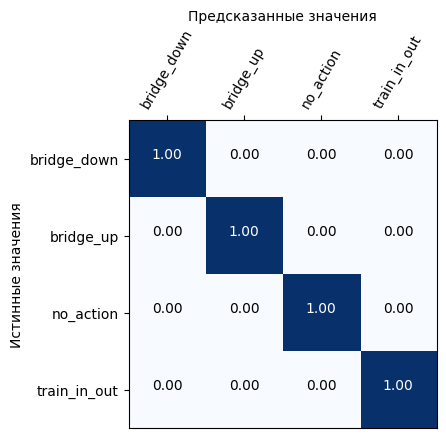

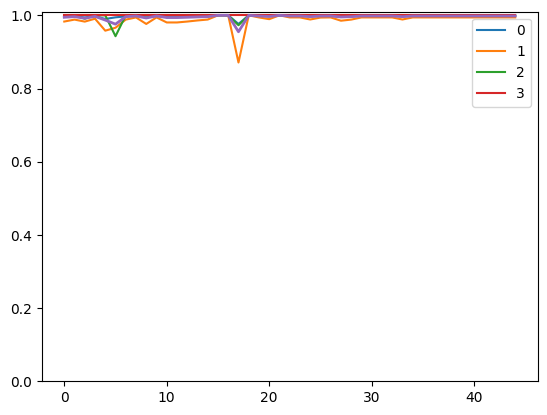

In [28]:
from sklearn.metrics import f1_score
from tensorflow.keras.utils import Sequence
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class DataGenerator(Sequence):
    def __init__(self, x1_set, x2_set, x3_set, y_set, batch_size):
#         self.x1, self.x2, self.x3, self.x4, self.y = x1_set, x2_set, x3_set, x4_set, y_set
        self.x1, self.x2, self.x3, self.y = x1_set, x2_set, x3_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x1) / self.batch_size))

    def __getitem__(self, idx):
        batch_x1 = self.x1[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x2 = self.x2[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_x3 = self.x3[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_x4 = self.x4[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]

        # Производим предобработку данных и возваращаем их в виде кортежа
#         processed_batch_x = # ваша функция предобработки данных
        return [batch_x1, batch_x2, batch_x3], batch_y

# Создаем генератор данных
batch_size = 40
generator = DataGenerator(x_train_norm2, x_train_move, x_train_noact, y_train, batch_size=batch_size)
val_data_gen = DataGenerator(x_val_norm2, x_val_move, x_val_noact, y_val, batch_size=batch_size)

# Обучаем модель
steps_per_epoch = len(y_train) // batch_size
epochs = 100
history_new_cnlst = model.fit(generator, validation_data=val_data_gen, steps_per_epoch=steps_per_epoch, 
                              class_weight={0: 0.6, 1:1, 2:1, 3:0.7}, 
                              epochs=epochs, workers=15, callbacks=[reduce_lr, early],)
#                               epochs=epochs, workers=10, callbacks=[F1Score2(val_data_gen)],)


print('loss', round(min(history_new_cnlst.history['val_loss']), 4), 
    'F1', round(max(history_new_cnlst.history['val_f1_score']), 4), sep='   ')

y_pred = model.predict(val_data_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_val, axis=1)
f1_scores = f1_score(y_test_classes, y_pred_classes, average=None)

for i, f1 in enumerate(f1_scores):
    print(f"F1 score for class {i}: {round(f1, 4)}")
    
y_true = y_val.argmax(axis=1)
y_pred = model.predict(val_data_gen).argmax(axis=1)

cm = confusion_matrix(y_true, y_pred, normalize='true')

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(cm, cmap=plt.cm.Blues)

plt.xticks(range(4))
plt.yticks(range(4))

ax.set_xticklabels(names, rotation=60)
ax.set_yticklabels(names)

plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")

threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f'{cm[i, j]:.2f}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black")
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='major')

plt.show()

plt.plot([h[0] for h in history_new_cnlst.history['val_F1']], label = '0')
plt.plot([h[1] for h in history_new_cnlst.history['val_F1']], label = '1')
plt.plot([h[2] for h in history_new_cnlst.history['val_F1']], label = '2')
plt.plot([h[3] for h in history_new_cnlst.history['val_F1']], label = '3')
plt.plot( history_new_cnlst.history['val_f1_score'], linewidth = 2)
plt.ylim(0, 1.01)
plt.legend();

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam', run_eagerly=True)
model.save('models/nn30_1.h5')

In [19]:
cv2.namedWindow("original", cv2.WINDOW_AUTOSIZE)
cv2.namedWindow("threshold", cv2.WINDOW_AUTOSIZE)

cap = cv2.VideoCapture(video_files[6])

frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
#     frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(frame)


frames = np.array(frames)
mean_frame = frames.mean(axis=0)
can = True
while can:
    for frame in frames:
        n = 1
        frame = cv2.resize(frame, (frame.shape[1]*n, frame.shape[0]*n))
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 31, 2) 
        cv2.imshow('original', frame-mean_frame)
        cv2.imshow('threshold', thresh)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            can = False
            break

cv2.destroyAllWindows()

KeyboardInterrupt: 

In [20]:
cv2.destroyAllWindows()

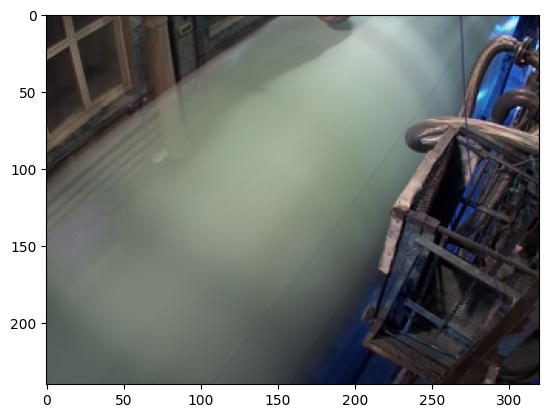

In [133]:
x_val_noact[297]
plt.imshow(mean_frame/255)
plt.show()